In [1]:
# init
import sys
print (sys.version)
import numpy as np
from sympy import *
from IPython.display import display, Markdown, Latex

u, v, t, w = symbols('u v t w', real=True)
#u, v, t = symbols('u v t')
x, y, z = symbols('x y z')
a, b, c = symbols('a b c')

import geo3py
import geo3py.utils as utils
from geo3py.surface import *
from geo3py.curve import *
from geo3py.solid import *
from geo3py.matrix3D import *
from geo3py.tetraeder import *
from geo3py.plots.plot import *

%matplotlib inline
#%matplotlib widget
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from spb import plot3d_parametric_surface, plot3d_parametric_line, PB, MB, KB
from spb import plot
from spb import plot3d

3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]


# Differentialgeometri og Parametrisk design - 01237 - E22

Kaare. G. S. Hansen, s214282 - DTU

Dato: 16. december 2022

Kode: 35269

## Opgave 1

![](2022-12-16-15-01-00.png)

In [2]:
tet1 = Tetraeder([0,0,0], [1,0,0],[0,1,0],[0,0,1])
tet2 = Tetraeder([0,0,0], [1,1,0],[1,0,1],[0,1,1])

display(
    tet1.getMatrix(),
    tet2.getMatrix()
)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

Matrix([
[1, 1, 0],
[1, 0, 1],
[0, 1, 1]])

![](2022-12-16-15-01-26.png)

In [3]:
tet2.getMatrix().det()

-2

Da determinanten er $< 0$, er orienteringen negativ

![](2022-12-16-15-01-38.png)

Givet ved numeriske værdi af determinanten over 6.

In [4]:
EqPrint('Vol(tet_2)', tet2.getVol())

$Vol(tet_2) = \frac{1}{3}$

![](2022-12-16-15-01-49.png)

Vi skal løse ligningen $K \cdot K_1 = K_2$. Finder den inverse af $K_1$.

In [5]:
K = tet2.getMatrix() * tet1.getMatrix().inv()
EqPrint('K', K)

$K = \left[\begin{matrix}1 & 1 & 0\\1 & 0 & 1\\0 & 1 & 1\end{matrix}\right]$

Vi tjekker at $K$ er rigtig ved at se om $K tet_1 = tet_2$

In [6]:
K * tet1.getMatrix()

Matrix([
[1, 1, 0],
[1, 0, 1],
[0, 1, 1]])

Hvilket den heldigvis er.

![](2022-12-16-15-02-06.png)

In [7]:
result = SVD3(K)
display(
    EqPrint('F', result.F_hat),
    EqPrint('\Sigma', result.S), 
    EqPrint('U', result.U),
    EqPrint('V', result.V),
)

$F = \left[\begin{matrix}0 & 1 & 0\\1 & 0 & 0\\0 & 0 & 1\end{matrix}\right]$

$\Sigma = \left[\begin{matrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 2\end{matrix}\right]$

$U = \left[\begin{matrix}0 & - \frac{\sqrt{6}}{3} & \frac{\sqrt{3}}{3}\\- \frac{\sqrt{2}}{2} & \frac{\sqrt{6}}{6} & \frac{\sqrt{3}}{3}\\\frac{\sqrt{2}}{2} & \frac{\sqrt{6}}{6} & \frac{\sqrt{3}}{3}\end{matrix}\right]$

$V = \left[\begin{matrix}- \frac{\sqrt{2}}{2} & - \frac{\sqrt{6}}{6} & \frac{\sqrt{3}}{3}\\\frac{\sqrt{2}}{2} & - \frac{\sqrt{6}}{6} & \frac{\sqrt{3}}{3}\\0 & \frac{\sqrt{6}}{3} & \frac{\sqrt{3}}{3}\end{matrix}\right]$

In [8]:
result = SVD3(K)
display(
    EqPrint('F', result.F_hat),
    EqPrint('\Sigma', result.S), 
    EqPrint('U', result.U.evalf()),
    EqPrint('V', result.V.evalf()),
)

$F = \left[\begin{matrix}0 & 1 & 0\\1 & 0 & 0\\0 & 0 & 1\end{matrix}\right]$

$\Sigma = \left[\begin{matrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 2\end{matrix}\right]$

$U = \left[\begin{matrix}0 & -0.816496580927726 & 0.577350269189626\\-0.707106781186548 & 0.408248290463863 & 0.577350269189626\\0.707106781186548 & 0.408248290463863 & 0.577350269189626\end{matrix}\right]$

$V = \left[\begin{matrix}-0.707106781186548 & -0.408248290463863 & 0.577350269189626\\0.707106781186548 & -0.408248290463863 & 0.577350269189626\\0 & 0.816496580927726 & 0.577350269189626\end{matrix}\right]$

## Opgave 2
![](2022-12-16-15-02-30.png)

In [9]:
p2 = Matrix([cos(t), sin(t), sqrt(3)*sin(t)])
t_dom = (t, -pi, pi)
curve2 = Curve3D(p2, t_dom)
v2 = curve2.p
EqPrint('p(t)', v2)

$p(t) = \left[\begin{matrix}\cos{\left(t \right)}\\\sin{\left(t \right)}\\\sqrt{3} \sin{\left(t \right)}\end{matrix}\right]$

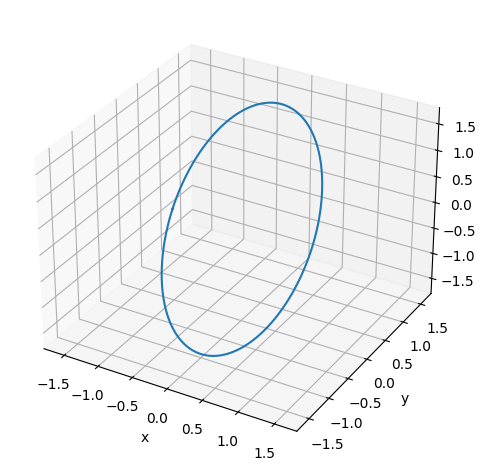

In [10]:
curve2.quickPlot()

![](2022-12-16-15-02-45.png)

In [11]:
v2 = get_v(curve2.p, curve2.t_dom[0])
EqPrint('v(t)', v2)

$v(t) = \sqrt{4 - 3 \sin^{2}{\left(t \right)}}$

Vi har taget farten af kurven, og det ses at udtrykket er forskelligt fra 1. Derfor er den ikke enhedsfart-parametriseret.

In [12]:
display(
    v2.subs({t:pi/2}),
    v2.subs({t:-pi/2})
)

1

1

Det kan dog bemærkes at netop når $t=\frac{\pi}{2}$ eller $t=-\frac{\pi}{2}$, er farten 1.

Dette skal dog gælde for samtlige værdier i intervallet før den er enheds-parametriseret.

![](2022-12-16-15-02-57.png)

In [13]:
#curve2.getFrenetSerret()
result = get_FrenetSerret(curve2.p, curve2.t_dom[0])
display(
    EqPrint('e(t)', result.e),
    EqPrint('f(t)', result.f),
    EqPrint('g(t)', result.g)
)

$e(t) = \left[\begin{matrix}- \frac{\sin{\left(t \right)}}{\sqrt{4 - 3 \sin^{2}{\left(t \right)}}}\\\frac{\cos{\left(t \right)}}{\sqrt{4 - 3 \sin^{2}{\left(t \right)}}}\\\frac{\sqrt{3} \cos{\left(t \right)}}{\sqrt{4 - 3 \sin^{2}{\left(t \right)}}}\end{matrix}\right]$

$f(t) = \left[\begin{matrix}- \frac{2 \cos{\left(t \right)}}{\sqrt{4 - 3 \sin^{2}{\left(t \right)}}}\\- \frac{\sin{\left(t \right)}}{2 \sqrt{4 - 3 \sin^{2}{\left(t \right)}}}\\- \frac{\sqrt{3} \sin{\left(t \right)}}{2 \sqrt{4 - 3 \sin^{2}{\left(t \right)}}}\end{matrix}\right]$

$g(t) = \left[\begin{matrix}0\\- \frac{\sqrt{3}}{2}\\\frac{1}{2}\end{matrix}\right]$

![](2022-12-16-15-03-08.png)

In [14]:
#get_kappa(curve2.p, curve2.t_dom[0], v2)
EqPrint('\kappa(t)', curve2.getKappa())

$\kappa(t) = \frac{2}{\left(4 - 3 \sin^{2}{\left(t \right)}\right)^{\frac{3}{2}}}$

![](2022-12-16-15-03-23.png)

In [15]:
EqPrint('\\tau(t)', curve2.getTau())

$\tau(t) = 0$

Bemærker en torsion på 0 for alle værdier af $t$

![](2022-12-16-15-03-41.png)

In [16]:
r2 = u*p2
u_dom = (u, Rational(1,2), 1)
surf2 = Surface3D('r(t,u)', r2, t_dom, u_dom)
EqPrint('r(t,u)', surf2.r)

$r(t,u) = \left[\begin{matrix}u \cos{\left(t \right)}\\u \sin{\left(t \right)}\\\sqrt{3} u \sin{\left(t \right)}\end{matrix}\right]$

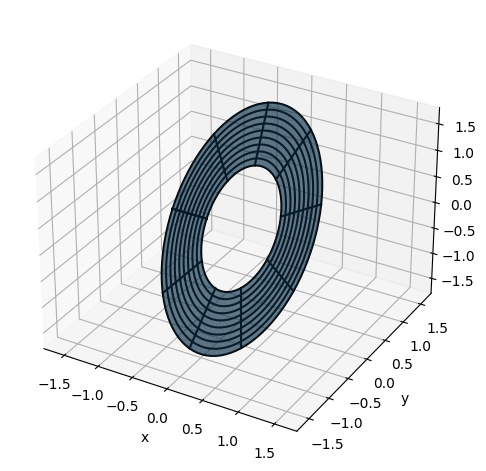

In [17]:
surf2.quickPlot()

In [18]:
area, details = surf2.getArea()
display(
    details.jacobi,
    details.area
)

Eq(Jacobi, 2*Abs(u))

Eq(A, 3*pi/2)

Vi ser en skive-agtig flade med hul i midten.

## Opgave 3
![](2022-12-16-15-04-14.png)

In [19]:
#u, v = symbols('u_C v_C')

s3 = Matrix([u, v, sin(u)*cos(v)])
u_dom = (u, -pi, pi)
v_dom = (v, -pi, pi)
surf3 = Surface3D('s(u, v', s3, u_dom, v_dom)
EqPrint('s(u,v)', surf3.r)

$s(u,v) = \left[\begin{matrix}u\\v\\\sin{\left(u \right)} \cos{\left(v \right)}\end{matrix}\right]$

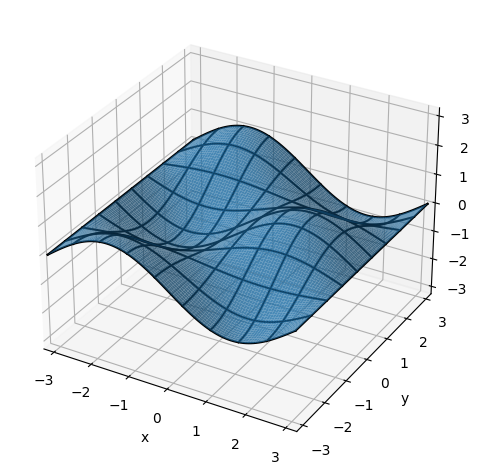

In [20]:
surf3.quickPlot()

![](2022-12-16-15-04-29.png)

In [21]:
jac3 = surf3.getJacobi()
EqPrint('Jacobi_s', jac3)

$Jacobi_s = \frac{\sqrt{\cos{\left(2 u - 2 v \right)} + \cos{\left(2 u + 2 v \right)} + 6}}{2}$

![](2022-12-16-15-04-37.png)

In [22]:
area, details = surf3.getArea()
display(
    *details
)

Eq(A, Integral(sqrt(cos(2*u - 2*v) + cos(2*u + 2*v) + 6), (u, -pi, pi), (v, -pi, pi))/2)

Eq(Jacobi, sqrt(cos(2*u - 2*v) + cos(2*u + 2*v) + 6)/2)

Eq(A, Integral(sqrt(cos(2*u - 2*v) + cos(2*u + 2*v) + 6), (u, -pi, pi), (v, -pi, pi))/2)

(u, -pi, pi)

(v, -pi, pi)

In [23]:
simplify(area.evalf().subs({u:pi,v:pi}))

0.5*Integral(sqrt(cos(2*u - 2*v) + cos(2*u + 2*v) + 6), (u, -pi, pi), (v, -pi, pi))

In [24]:
print(details.jacobi)

Eq(Jacobi, sqrt(cos(2*u - 2*v) + cos(2*u + 2*v) + 6)/2)


Den kan ikke finde ud af integralet, så vi kan ikke finde arealet direkte.

En metode ville være at finde et approksimerende Taylor-polynomium, og så integrere dette for at finde et approksimativt areal af fladen.

Alternativt kan numerisk integration også benyttes. Dette kan gøres ved hjælp af scipy.

In [25]:
(Integral(jac3, (u, -pi, pi), (v, -pi, pi)) ** 2).evalf(20)

Integral(sqrt(cos(2*u - 2*v) + cos(2*u + 2*v) + 6)/2, (u, -pi, pi), (v, -pi, pi))**2

![](2022-12-16-15-04-47.png)

Indsætter $\pi/2$ på $v$'s plads og udregner Weingarten

In [26]:
weingarten = surf3.getWeingarten()
display(weingarten)

weingarten = weingarten.subs({v: pi/2})
#display(weingarten)

Matrix([
[8*(cos(v)**2 - 2)*sin(u)*cos(v)/(cos(2*u - 2*v) + cos(2*u + 2*v) + 6)**(3/2), 8*(cos(u)**2 - 2)*sin(v)*cos(u)/(cos(2*u - 2*v) + cos(2*u + 2*v) + 6)**(3/2)],
[8*(sin(v)**2 - 2)*sin(v)*cos(u)/(cos(2*u - 2*v) + cos(2*u + 2*v) + 6)**(3/2), 8*(sin(u)**2 - 2)*sin(u)*cos(v)/(cos(2*u - 2*v) + cos(2*u + 2*v) + 6)**(3/2)]])

Simplifier Weingarten...

In [27]:
EqPrint('W(u,\pi/2)', simplify(weingarten))

$W(u,\pi/2) = \left[\begin{matrix}0 & - \frac{\cos{\left(u \right)}}{\sqrt{\sin^{2}{\left(u \right)} + 1}}\\- \frac{2 \sqrt{2} \cos{\left(u \right)}}{\left(3 - \cos{\left(2 u \right)}\right)^{\frac{3}{2}}} & 0\end{matrix}\right]$

![](2022-12-16-15-05-03.png)

Samme procedure som for Weingarten

In [28]:
GaussK = surf3.getGaussK()
GaussK = GaussK.subs({v:pi/2})
display(GaussK)

(64*cos(u)**4 - 128*cos(u)**2)/(-8*cos(2*u)**3 + 72*cos(2*u)**2 - 216*cos(2*u) + 216)

Indsætter den konstante $v$

In [29]:
GaussK = simplify(GaussK)
display(EqPrint('K(u,\pi/2)', GaussK))

$K(u,\pi/2) = - \frac{\cos^{2}{\left(u \right)}}{\left(\sin^{2}{\left(u \right)} + 1\right)^{2}}$

![](2022-12-16-15-05-20.png)

Igen samme procedure

In [30]:
MiddelH = surf3.getMiddelH()
display(EqPrint('H(u,v)', MiddelH))
MiddelH = MiddelH.subs({v:pi/2})
display(EqPrint('H(u, \pi/2)', MiddelH))

$H(u,v) = \frac{4 \left(\sin^{2}{\left(u \right)} - 2\right) \sin{\left(u \right)} \cos{\left(v \right)}}{\left(\cos{\left(2 u - 2 v \right)} + \cos{\left(2 u + 2 v \right)} + 6\right)^{\frac{3}{2}}} + \frac{4 \left(\cos^{2}{\left(v \right)} - 2\right) \sin{\left(u \right)} \cos{\left(v \right)}}{\left(\cos{\left(2 u - 2 v \right)} + \cos{\left(2 u + 2 v \right)} + 6\right)^{\frac{3}{2}}}$

$H(u, \pi/2) = 0$

Vi observerer at $H(u) = 0$, når $v=\pi/2$

 Det omvendte vil også gælde  for $u$ med værdier der opfylder $sin(u)=0$, dvs. $-\pi$, $0$ og $\pi$.

~~At middel-krumningen er konstant 0, vil sige at fladen er mulig med et ustrækeligt stykke papir.~~

In [31]:
u_dom = (u, -pi, pi)
v_dom = (v, -pi, pi)
surf3_2 = Surface3D('s_2(u, v', surf3.r.subs({v:pi/2}), u_dom, v_dom)
EqPrint('s_2(u,v)', surf3_2.r)

$s_2(u,v) = \left[\begin{matrix}u\\\frac{\pi}{2}\\0\end{matrix}\right]$

Vi observerer at parameterfremstillingen er gået fra flade til en ret linje efter at vi har sat $v=\pi/2$

![](2022-12-16-15-05-31.png)

In [32]:
K3 = simplify(surf3.getGaussK().subs({v:pi/2}))
H3 = simplify(surf3.getMiddelH().subs({v:pi/2}))
display(K3, H3)

-cos(u)**2/(sin(u)**2 + 1)**2

0

For at vi har et navlepunkt, skal det gælde at: $H^2 = K$ 

In [33]:
eq3 = Eq(H3**2, K3)
eq3

Eq(0, -cos(u)**2/(sin(u)**2 + 1)**2)

Vi løser for overstående ligning

In [34]:
sol3 = solve(eq3, dict=True)
display(
    sol3[0][u],
    sol3[1][u],
)

pi/2

3*pi/2

Der er altså tale om navlepunkter netop når $u=\pi/2$ eller $u=\pi -1/2$, når $v=\pi/2$

Slut...